In [1]:
; テキストの実装から変更している。
; 通常の線形変換の数式に沿っている。
(define (frame-coord-map frame)
  (lambda (v)
    (let ((edge1 (edge1-frame frame))
          (edge2 (edge2-frame frame)))
      (add-vect
       (origin-frame frame)
       (make-vect
        (+ (* (xcor-vect edge1) (xcor-vect v)) (* (xcor-vect edge2) (ycor-vect v)))
        (+ (* (ycor-vect edge1) (xcor-vect v)) (* (ycor-vect edge2) (ycor-vect v)))
        )
      )
     )
    )
  )

; ベクトルコンストラクタ・セレクタ
(define (make-vect x y) (cons x y))
(define (xcor-vect v)(car v))
(define (ycor-vect v)(cdr v))

; ベクトル演算
(define (add-vect v1 v2)
  (make-vect (+ (xcor-vect v1)
                (xcor-vect v2))
             (+ (ycor-vect v1)
                (ycor-vect v2))))
(define (sub-vect v1 v2)
  (make-vect (- (xcor-vect v1)
                (xcor-vect v2))
             (- (ycor-vect v1)
                (ycor-vect v2))))
(define (scale-vect s v)
  (make-vect (* s (xcor-vect v))
             (* s (ycor-vect v))))

; フレームコンストラクタ・セレクタ
(define (make-frame origin edge1 edge2)(list origin edge1 edge2))
(define (origin-frame frame)(car frame))
(define (edge1-frame frame)(cadr frame))
(define (edge2-frame frame)(caddr frame))

; 線分コンストラクタ・セレクタ
(define (make-segment v1 v2)(cons v1 v2))
(define (start-segment seg)(car seg))
(define (end-segment seg)(cdr seg))

; ペインタ
(define (segments->painter segment-list)
  (lambda (frame)
    (for-each
     (lambda (segment)
       (draw-line
        ((frame-coord-map frame) (start-segment segment))
        ((frame-coord-map frame) (end-segment segment))))
     segment-list)))

; waveペインタ
(define wave
  (lambda (frame)
    ((segments->painter
      (list (make-segment (make-vect 0.000 0.645) (make-vect 0.154 0.411))
            (make-segment (make-vect 0.154 0.411) (make-vect 0.302 0.588))
            (make-segment (make-vect 0.302 0.588) (make-vect 0.354 0.497))
            (make-segment (make-vect 0.354 0.497) (make-vect 0.245 0.000))
            (make-segment (make-vect 0.419 0.000) (make-vect 0.497 0.171))
            (make-segment (make-vect 0.497 0.171) (make-vect 0.575 0.000))
            (make-segment (make-vect 0.748 0.000) (make-vect 0.605 0.462))
            (make-segment (make-vect 0.605 0.462) (make-vect 1.000 0.142))
            (make-segment (make-vect 1.000 0.354) (make-vect 0.748 0.657))
            (make-segment (make-vect 0.748 0.657) (make-vect 0.582 0.657))
            (make-segment (make-vect 0.582 0.657) (make-vect 0.640 0.857))
            (make-segment (make-vect 0.640 0.857) (make-vect 0.575 1.000))
            (make-segment (make-vect 0.419 1.000) (make-vect 0.354 0.857))
            (make-segment (make-vect 0.354 0.857) (make-vect 0.411 0.657))
            (make-segment (make-vect 0.411 0.657) (make-vect 0.285 0.657))
            (make-segment (make-vect 0.285 0.657) (make-vect 0.154 0.605))
            (make-segment (make-vect 0.154 0.605) (make-vect 0.000 0.857)))) frame)))


; ペインタ変換と組み合わせ
(define (transform-painter painter origin corner1 corner2)
  (lambda (frame)
    (let ((m (frame-coord-map frame)))
      (let ((new-origin (m origin))
            (o (origin-frame frame)))
        (painter
         (make-frame new-origin
                     (sub-vect (m corner1) o)
                     (sub-vect (m corner2) o)
                     )
         )
        )
      )
    )
  )


(define (flip-vert painter)
  (transform-painter painter
                     ;(make-vect 0.0 1.0)
                     ;(make-vect 1.0 1.0)
                     ;(make-vect 0.0 0.0)
                     (make-vect 0.0 1.0)
                     (make-vect 1.0 0.0)
                     (make-vect 0.0 -1.0)
    )
  )

(define (beside painter1 painter2)
  (let ((split-point (make-vect 0.5 0.0)))
    (let ((paint-left
           (transform-painter painter1
                              (make-vect 0.0 0.0)
                              split-point
                              (make-vect 0.0 1.0)
                              )
           )
          (paint-right
           (transform-painter painter2
                              ;split-point
                              ;(make-vect 1.0 0.0)
                              ;(make-vect 0.5 1.0)
                              split-point
                              split-point
                              (make-vect 0.0 1.0)
                              )
           )
          )
      (lambda (frame)
        (paint-left frame)
        (paint-right frame)))))

(define (below painter1 painter2)
  (let ((split-point (make-vect 0.0 0.5)))
    (let ((paint-below
           (transform-painter painter1
                              (make-vect 0.0 0.0)
                              (make-vect 1.0 0.0)
                              split-point))
          (paint-above
           (transform-painter painter2
                              split-point
                              (make-vect 1.0 0.0)
                              (make-vect 0.0 0.5))))
      (lambda (frame)
        (paint-below frame)
        (paint-above frame)))))

(import-as "picseg" 'pic)

(define (draw-line v1 v2)
  (let ((start-x (xcor-vect v1))
        (start-y (ycor-vect v1))
        (end-x (xcor-vect v2))
        (end-y (ycor-vect v2)))
    (pic.draw_line start-x start-y end-x end-y)
    ;(display "(")
    ;(display start-x)
    ;(display ",")
    ;(display start-y)
    ;(display ") (")
    ;(display end-x)
    ;(display ",")
    ;(display end-y)
    ;(display ")")
    ;(newline)
    )
  )

; ペインタの動作確認
(define (paint painter)
  (let ((frame0 (make-frame
                            (make-vect 0 0)
                            (make-vect 1 0)
                            (make-vect 0 1))))
    (pic.clear)
    (painter frame0)
    (pic.update)
    )
  )

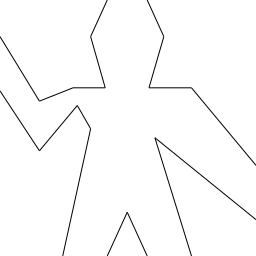

In [2]:
(paint wave)

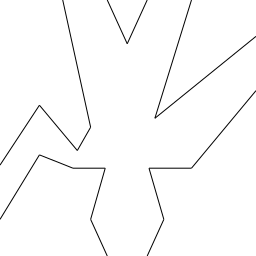

In [3]:
(paint (flip-vert wave))

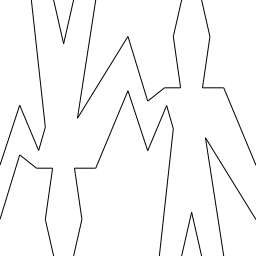

In [4]:
(paint (beside (flip-vert wave) wave))

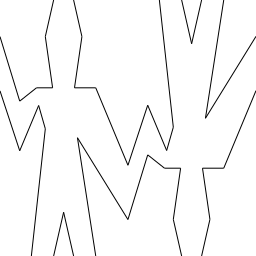

In [5]:
(paint (beside wave (flip-vert wave)))

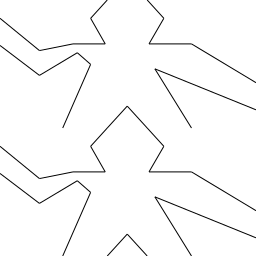

In [6]:
(paint (below wave wave))

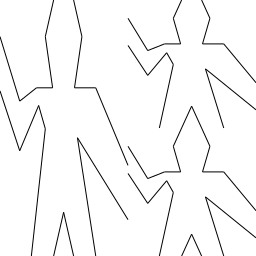

In [7]:
(paint (beside wave (below wave wave)))

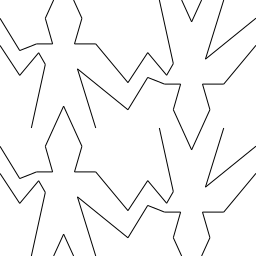

In [8]:
(paint (beside (below wave wave) (flip-vert (below wave wave))))

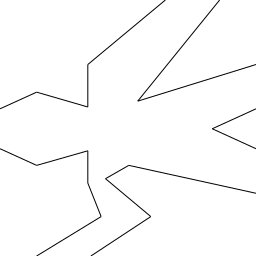

In [9]:
(define (rotate90 painter)
  (transform-painter painter
                     (make-vect 1.0 0.0)
                     (make-vect 0.0 1.0)
                     (make-vect -1.0 0.0)
            )
  )

(paint (rotate90 wave))

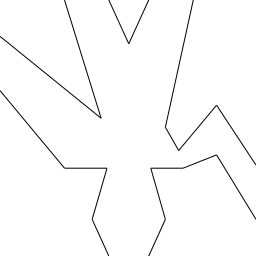

In [10]:
(define (rotate180 painter)
  (transform-painter painter
                     (make-vect 1.0 1.0)
                     (make-vect -1.0 0.0)
                     (make-vect 0.0 -1.0)
            )
  )

(paint (rotate180 wave))

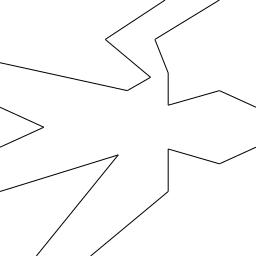

In [11]:
(define (rotate270 painter)
  (transform-painter painter
                     (make-vect 0.0 1.0)
                     (make-vect 0.0 -1.0)
                     (make-vect 1.0 0.0)
            )
  )

(paint (rotate270 wave))

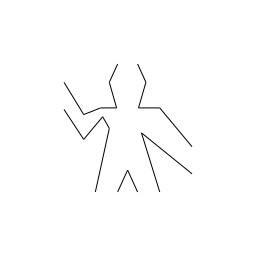

In [12]:
(define (squash-inwards painter)
  (transform-painter painter
                     (make-vect 0.25 0.25)
                     (make-vect 0.5 0.0)
                     (make-vect 0.0 0.5))
  )

(paint (squash-inwards wave))

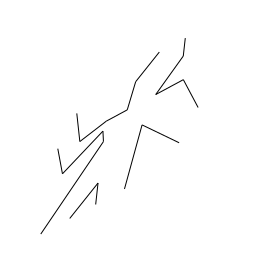

In [13]:
(define (squash-inwards painter)
  (transform-painter painter
                     (make-vect 0.0 0.0)
                     (make-vect 0.65 0.35) 
                     (make-vect 0.35 0.65))
  )

(paint (squash-inwards wave))

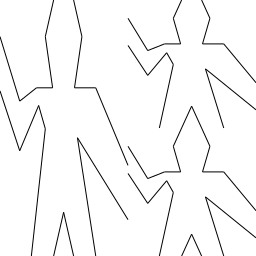

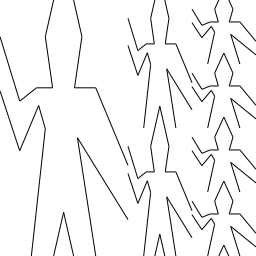

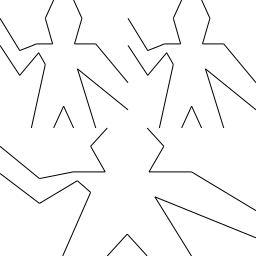

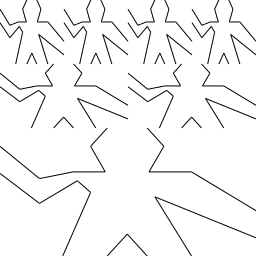

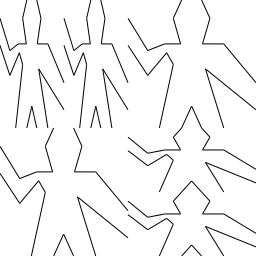

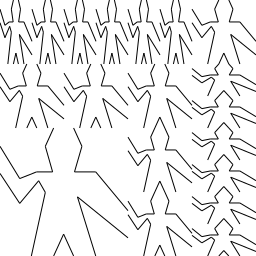

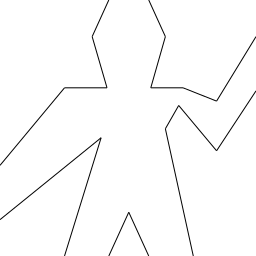

In [14]:
(define (right-split painter n)
  (if (= n 0)
      painter
      (let ((smaller (right-split painter (- n 1))))
        (beside painter (below smaller smaller)))))

(define (up-split painter n)
  (if (= n 0)
      painter
      (let ((smaller (up-split painter (- n 1))))
        (below painter (beside smaller smaller)))))

(define (corner-split painter n)
  (if (= n 0)
      painter
      (let ((up (up-split painter (- n 1)))
            (right (right-split painter (- n 1))))
        (let ((top-left (beside up up))
              (bottom-right (below right right))
              (corner (corner-split painter (- n 1))))
          (beside (below painter top-left)
                  (below bottom-right corner))))))

(define (flip-horiz painter)
  (transform-painter painter
                     (make-vect 1.0 0.0)
                     (make-vect -1.0 0.0)
                     (make-vect 0.0 1.0)))

(paint (right-split wave 1))
(paint (right-split wave 2))
(paint (up-split wave 1))
(paint (up-split wave 2))
(paint (corner-split wave 1))
(paint (corner-split wave 2))
(paint (flip-horiz wave))

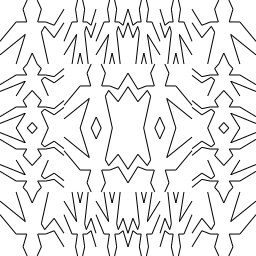

In [15]:
(define (square-limit painter n)
  (let ((quarter (corner-split painter n)))
    (let ((half (beside (flip-horiz quarter) quarter)))
      (below (flip-vert half) half))))

(paint (square-limit wave 1))

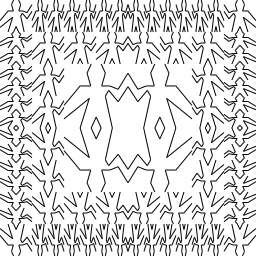

In [16]:
(paint (square-limit wave 2))

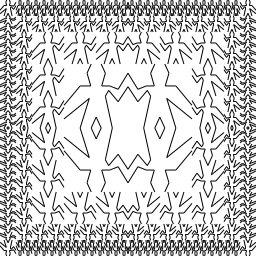

In [17]:
(paint (square-limit wave 3))